In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import tqdm

In [7]:
transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform= transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform= transform)

In [8]:
len(train_dataset)

50000

In [9]:
len(test_dataset)

10000

In [10]:
train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

In [11]:
images_np_list = []
labels_np_list = []
for images, labels in train_loader:
  images_np_list.append(np.array(images.squeeze().numpy()*255, dtype=np.uint8))
  labels_np_list.append(labels.numpy())

In [12]:
images_np_list = np.concatenate(images_np_list)
labels_np_list = np.concatenate(labels_np_list)

In [13]:
len(images_np_list)

50000

In [14]:
images_np_list.shape

(50000, 3, 32, 32)

In [15]:
images_np_list[0].shape

(3, 32, 32)

In [16]:
set(labels_np_list)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

In [17]:
import matplotlib.pyplot as plt

In [22]:
images_np_list.mean()

np.float64(120.70756512369792)

In [23]:
images_np_list.std()

np.float64(64.1500758911213)

In [24]:
np.median(images_np_list)

np.float64(117.0)

In [25]:
np.max(images_np_list)

np.uint8(255)

In [26]:
np.min(images_np_list)

np.uint8(0)

In [30]:
cifar_hist = np.zeros(256, dtype= np.int32)

In [31]:
for img in tqdm.tqdm(images_np_list):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      intensity = img[i,j]

      cifar_hist[intensity] += 1

100%|██████████| 50000/50000 [00:13<00:00, 3616.09it/s]


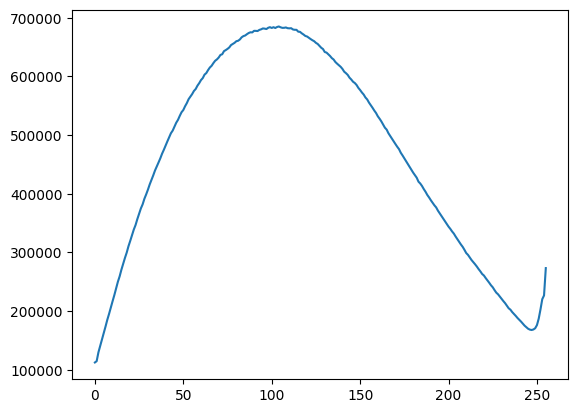

In [33]:
plt.plot(cifar_hist)
plt.show()